In [1]:
import pandas as pd
import numpy as np
import dask.dataframe as dd
from sklearn import preprocessing
import warnings, sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    import dask
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import statsmodels.robust
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
from sklearn import metrics
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC


In [2]:
# Data types for less memory usage
dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
#def convert_types(df):
    # Convert data types to reduce memory
   # for c in df:
    #    col_type = str(df[c].dtypes)
    #    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
        
        # Convert objects to category
  #      if col_type == 'object':
  #          df[c] = df[c].astype('category')
        
        # numerics
     #   elif col_type in numerics:
      #      c_min = df[c].min()
       #     c_max = df[c].max()
    #        if col_type[:3] == 'int':
    #            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
   #                 df[c] = df[c].astype(np.int8)
     #           elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
      #              df[c] = df[c].astype(np.int16)
      #          elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
      #              df[c] = df[c].astype(np.int32)
       #         elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
       #             df[c] = df[c].astype(np.int64)  
        #    else:
         #       if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
          #          df[c] = df[c].astype(np.float16)
          #      elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
           #         df[c] = df[c].astype(np.float32)
            #    else:
             #       df[c] = df[c].astype(np.float64)  
        
    # return df

In [4]:
train = dd.read_csv('train.csv', dtype=dtypes)
train = train.compute()

In [5]:
def update_feature_lists():
    binary = [c for c in train.columns if train[c].nunique() == 2]
    numerical = ['Census_ProcessorCoreCount',
                 'Census_PrimaryDiskTotalCapacity',
                 'Census_SystemVolumeTotalCapacity',
                 'Census_TotalPhysicalRAM',
                 'Census_InternalPrimaryDiagonalDisplaySizeInInches',
                 'Census_InternalPrimaryDisplayResolutionHorizontal',
                 'Census_InternalPrimaryDisplayResolutionVertical',
                 'Census_InternalBatteryNumberOfCharges']
    categorical = [c for c in train.columns if (c not in numerical) & (c not in binary)]
    return binary, numerical, categorical
    
binary_columns, true_numerical_columns, categorical_columns = update_feature_lists()

In [6]:
print(train.count)

<bound method DataFrame.count of                       MachineIdentifier   ProductName EngineVersion  \
0      0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1      000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2      000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3      00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4      000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   
...                                 ...           ...           ...   
67082  ffffedfe8fcc46e6d36ab39953589fee  win8defender   1.1.15100.1   
67083  ffffef606490b2970873ec0a27ebd24b  win8defender   1.1.13303.0   
67084  fffff8a40070d2d8379bb7fa2ed2fa66  win8defender   1.1.15200.1   
67085  fffffbbaaf5969ae4b93e7f3f6d7132f  win8defender   1.1.14901.4   
67086  ffffff75ba4f33d938ccfdb148b8ea16  win8defender   1.1.15200.1   

             AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  \
0       4.18.1807.18075  1.273.1735.0       0  

In [7]:
print(train.shape)
train.head()

(8921483, 83)


,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,...,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,...,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,...,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,...,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,NaN,53447.0,...,19844.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8921483 entries, 0 to 67086
Data columns (total 83 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   MachineIdentifier                                  category
 1   ProductName                                        category
 2   EngineVersion                                      category
 3   AppVersion                                         category
 4   AvSigVersion                                       category
 5   IsBeta                                             int8    
 6   RtpStateBitfield                                   float16 
 7   IsSxsPassiveMode                                   int8    
 8   DefaultBrowsersIdentifier                          float16 
 9   AVProductStatesIdentifier                          float32 
 10  AVProductsInstalled                                float16 
 11  AVProductsEnabled                      

-------------------------------------------------------------------------------------------------------
Find Null and Missing values 
-----------------------------------------------------------------------------------------------

In [9]:
stats = []
for col in train.columns:
    stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of missing values', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
28,PuaMode,2,99.974119,99.974119,category
41,Census_ProcessorClass,3,99.589407,99.589407,category
8,DefaultBrowsersIdentifier,1730,95.141637,95.141637,float16
68,Census_IsFlightingInternal,2,83.044030,83.044030,float16
52,Census_InternalBatteryType,78,71.046809,71.046809,category
...,...,...,...,...,...
1,ProductName,6,0.000000,98.935569,category
45,Census_HasOpticalDiskDrive,2,0.000000,92.281272,int8
54,Census_OSVersion,469,0.000000,15.845202,category
55,Census_OSArchitecture,3,0.000000,90.858045,category


In [10]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Total Columns: " + str(df.shape[1]) + "\n"     
            "Missing Columns #: " + str(mis_val_table_ren_columns.shape[0]))
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [11]:
print(missing_values_table(train))

Total Columns: 83
Missing Columns #: 44
                                                   Missing Values  \
PuaMode                                                   8919174   
Census_ProcessorClass                                     8884852   
DefaultBrowsersIdentifier                                 8488045   
Census_IsFlightingInternal                                7408759   
Census_InternalBatteryType                                6338429   
Census_ThresholdOptIn                                     5667325   
Census_IsWIMBootEnabled                                   5659703   
SmartScreen                                               3177011   
OrganizationIdentifier                                    2751518   
SMode                                                      537759   
CityIdentifier                                             325409   
Wdft_RegionIdentifier                                      303451   
Wdft_IsGamer                                               3034

In [12]:
train['HasDetections'].value_counts()

0    4462591
1    4458892
Name: HasDetections, dtype: int64

<AxesSubplot:>

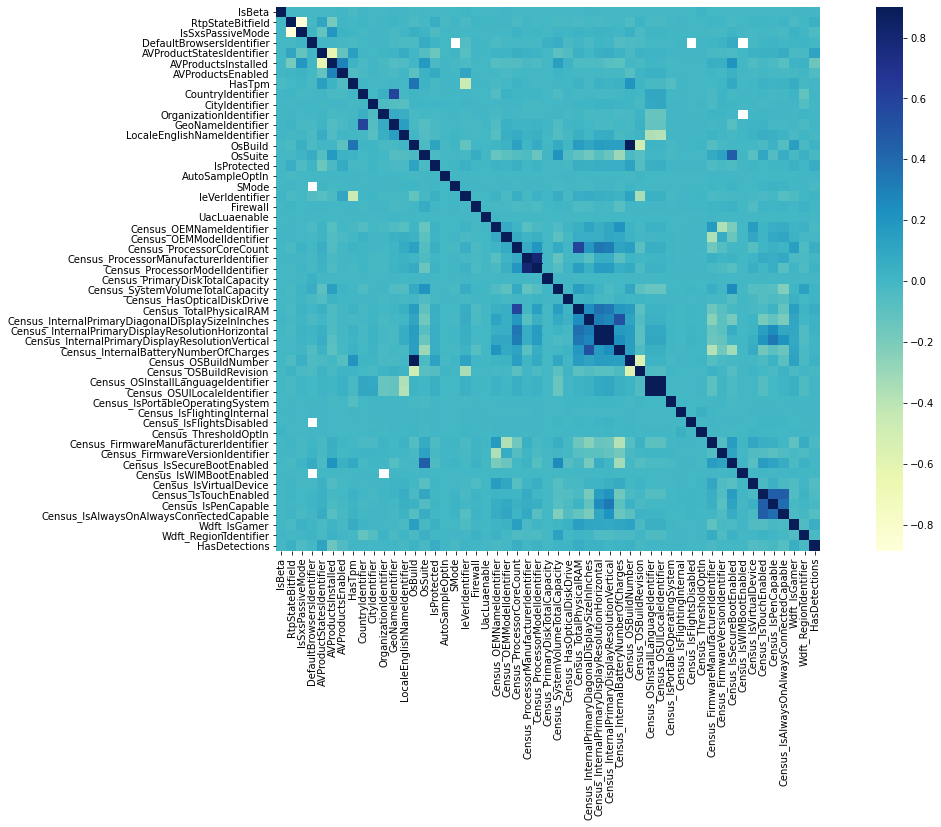

In [13]:
train
corrmat = train.corr()
plt.subplots(figsize=(20, 10))
sns.heatmap(corrmat, cmap="YlGnBu", vmax=.9, square=True)

In [14]:
    c= train.corrwith(train["HasDetections"]).sort_values()
c

AVProductsInstalled                                 -0.149626
Census_IsAlwaysOnAlwaysConnectedCapable             -0.062780
Census_IsVirtualDevice                              -0.051464
AVProductsEnabled                                   -0.041985
Census_IsTouchEnabled                               -0.040410
IsSxsPassiveMode                                    -0.035066
Census_FirmwareManufacturerIdentifier               -0.025924
Wdft_RegionIdentifier                               -0.022855
OsSuite                                             -0.020301
Census_IsPenCapable                                 -0.017177
Census_OEMNameIdentifier                            -0.015541
SMode                                               -0.014536
LocaleEnglishNameIdentifier                         -0.009981
Census_OSBuildRevision                              -0.009342
Census_OEMModelIdentifier                           -0.004512
Census_IsFlightsDisabled                            -0.002807
CityIden

Seperate the categorical and the numerical columns in the Train Set

In [15]:
categorical_columns = list(train.loc[:, train.dtypes =="category"].columns)
numerical_and_binary_columns = list(train.loc[:, train.dtypes !="category"].columns)
numerical_columns = numerical_and_binary_columns

categorical_columns.remove("MachineIdentifier")

binary_columns = []
for col in (numerical_and_binary_columns):
    if train[col].nunique() == 2:
        binary_columns.append(col)
        numerical_columns.remove(col)

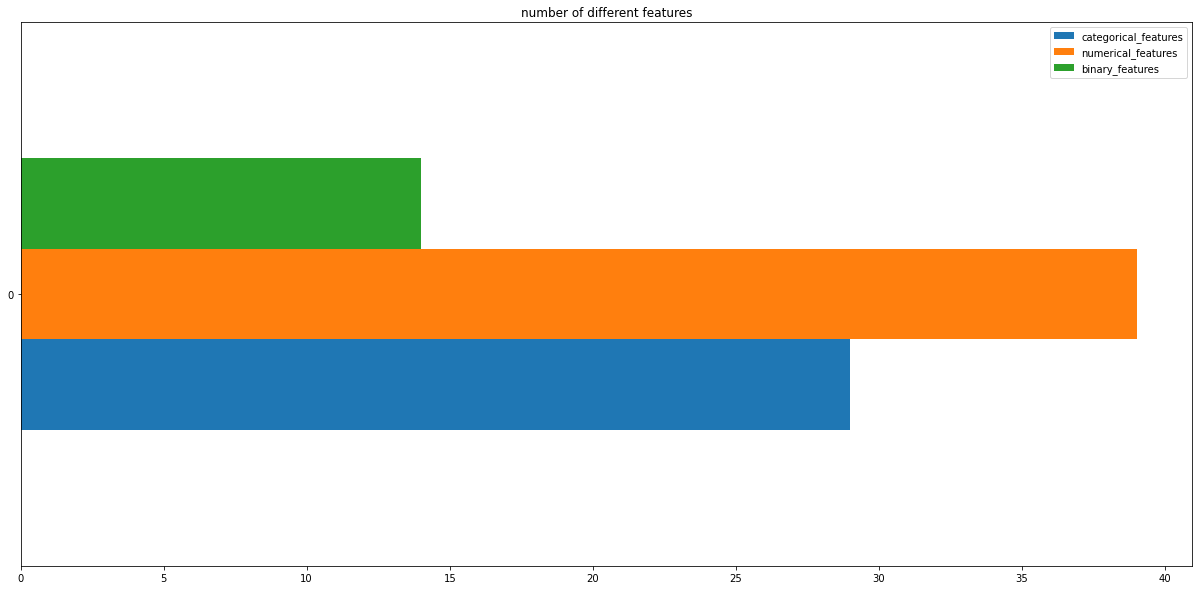

In [16]:
categories_list = []
categories_list.append(len(categorical_columns))
categories_list.append(len(numerical_columns))
categories_list.append(len(binary_columns))

categories_df = pd.DataFrame(categories_list, 
                             index=["categorical_features", "numerical_features", "binary_features"])

categories_df = categories_df.transpose().plot(kind="barh", figsize=(21, 10), title="number of different features")

In [17]:
def with_hue(plot, feature, Number_of_categories,hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [18]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

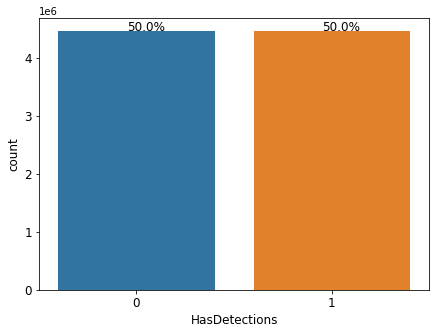

In [19]:
plt.figure(figsize = (7,5))
ax = sns.countplot('HasDetections', data = train)
plt.xticks(size = 12)
plt.xlabel('HasDetections', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

without_hue(ax, train.HasDetections)

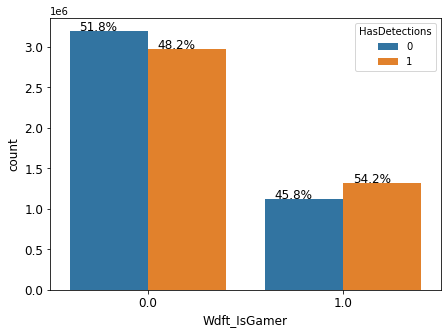

In [20]:
plt.figure(figsize = (7,5))
ax = sns.countplot('Wdft_IsGamer', hue= 'HasDetections', data = train)
plt.xticks(size = 12)
plt.xlabel('Wdft_IsGamer', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, train.Wdft_IsGamer,2,2)

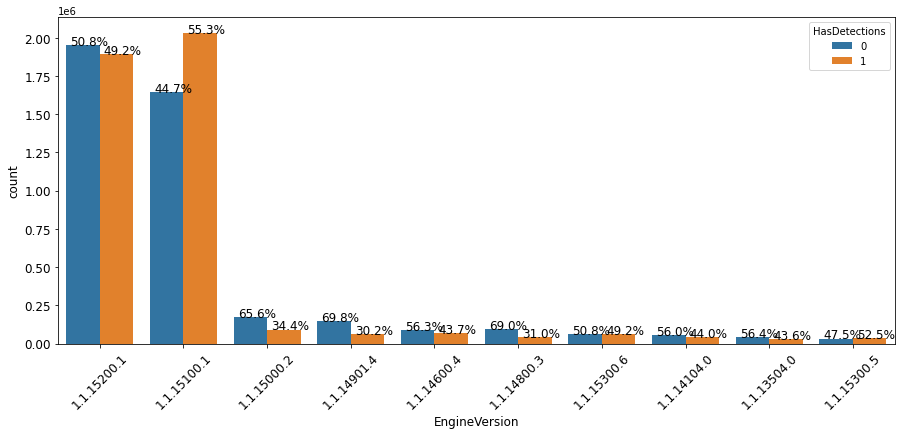

In [21]:
plt.figure(figsize = (15,6))
ax = sns.countplot('EngineVersion', order = train.EngineVersion.value_counts().iloc[:10].index, hue = 'HasDetections', data = train)
plt.xticks(rotation = 45, size = 12)
plt.xlabel('EngineVersion', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, train.EngineVersion, 10, 2)

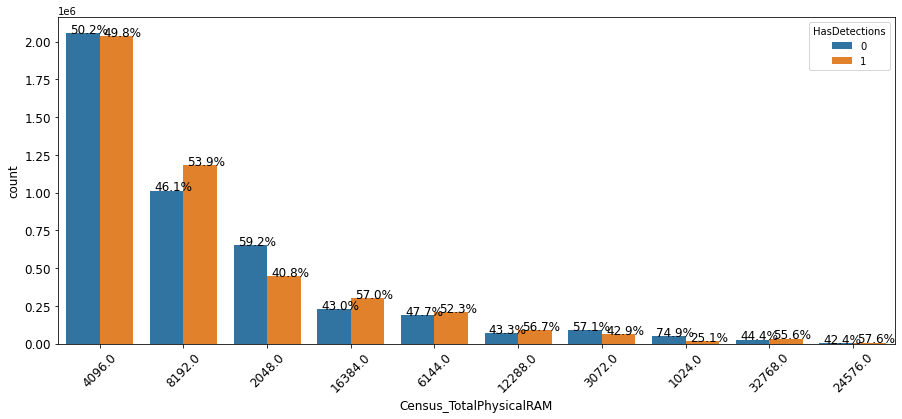

In [22]:
plt.figure(figsize = (15,6))
ax = sns.countplot('Census_TotalPhysicalRAM', order = train.Census_TotalPhysicalRAM.value_counts().iloc[:10].index, hue = 'HasDetections', data = train)
plt.xticks(rotation = 45, size = 12)
plt.xlabel('Census_TotalPhysicalRAM', size = 12)
plt.yticks(size = 12)
plt.ylabel('count', size = 12)

with_hue(ax, train.Census_TotalPhysicalRAM, 10, 2)


Feature Engineering 

In [23]:
#Drop 9 Features with over 30% null 
train.drop(['PuaMode','Census_ProcessorClass','DefaultBrowsersIdentifier', 'Census_IsFlightingInternal','Census_InternalBatteryType', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled', 'SmartScreen', 'OrganizationIdentifier'], axis = 1) 

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,53447.0,1.0,...,628.0,36144.0,0,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,53447.0,1.0,...,628.0,57858.0,0,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,53447.0,1.0,...,142.0,52682.0,0,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,53447.0,1.0,...,355.0,20050.0,0,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1379.0,0,7.0,0,53447.0,1.0,...,355.0,19844.0,0,0.0,0,0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67082,ffffedfe8fcc46e6d36ab39953589fee,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1555.0,0,7.0,0,53447.0,1.0,...,556.0,63069.0,1,0.0,0,0,0.0,0.0,5.0,1
67083,ffffef606490b2970873ec0a27ebd24b,win8defender,1.1.13303.0,4.9.10586.672,1.233.4218.0,0,7.0,0,59914.0,2.0,...,NaN,NaN,0,0.0,0,0,0.0,0.0,5.0,0
67084,fffff8a40070d2d8379bb7fa2ed2fa66,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1242.0,0,7.0,0,53447.0,1.0,...,513.0,71061.0,1,0.0,0,0,0.0,0.0,7.0,1
67085,fffffbbaaf5969ae4b93e7f3f6d7132f,win8defender,1.1.14901.4,4.16.17656.18052,1.269.1834.0,0,7.0,0,6630.0,3.0,...,554.0,33142.0,1,0.0,0,0,0.0,0.0,13.0,1


In [24]:
def unique_val(data, columns):
    unique = []
    for col in columns:
        u = data[col].nunique()
        unique.append((col,u,data[col].value_counts(normalize=True).values[0] * 100))
    return unique

In [25]:
columns = train.columns
unique = unique_val(train, columns)

In [26]:
unique_values = pd.DataFrame(unique, columns = ['Features','unique_values','Largest category percentage']).sort_values('Largest category percentage', 
                                                                                                                       ascending = False)

In [27]:
imbalanced_columns = unique_values[unique_values['Largest category percentage'] > 90.0]
imbalanced_columns

,Features,unique_values,Largest category percentage
75,Census_IsWIMBootEnabled,2,99.999969
5,IsBeta,2,99.999249
69,Census_IsFlightsDisabled,2,99.998996
68,Census_IsFlightingInternal,2,99.998612
27,AutoSampleOptIn,2,99.997108
71,Census_ThresholdOptIn,2,99.974924
29,SMode,2,99.953708
65,Census_IsPortableOperatingSystem,2,99.945480
28,PuaMode,2,99.913382
35,Census_DeviceFamily,3,99.838256


In [28]:
len(imbalanced_columns)

27

In [29]:
#dropping the imbalanced columns
train1 = train.drop(columns = imbalanced_columns.Features)

In [30]:
train1=train1.drop('MachineIdentifier', axis= 1)

In [31]:
train1.DefaultBrowsersIdentifier.fillna(0, inplace=True)

In [32]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist', 'ExistsNotSet' : 'ExistsNotSet'
}
train1.replace({'SmartScreen': trans_dict}, inplace=True)

In [33]:
train1.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [34]:
trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}
train1.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

In [35]:
train1.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)

In [36]:
trans_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 
    'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', 
    '00000000': '0', '&#x03;': '3', np.nan: 'NoExist', 'ExistsNotSet' : 'ExistsNotSet'
}
train1.replace({'SmartScreen': trans_dict}, inplace=True)

In [37]:
trans_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}
train1.replace({'Census_InternalBatteryType': trans_dict}, inplace=True)

In [38]:
train1.dropna(inplace=True)

In [39]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25430 entries, 737 to 67073
Data columns (total 55 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   EngineVersion                                      25430 non-null  category
 1   AppVersion                                         25430 non-null  category
 2   AvSigVersion                                       25430 non-null  category
 3   DefaultBrowsersIdentifier                          25430 non-null  float16 
 4   AVProductStatesIdentifier                          25430 non-null  float32 
 5   AVProductsInstalled                                25430 non-null  float16 
 6   CountryIdentifier                                  25430 non-null  int16   
 7   CityIdentifier                                     25430 non-null  float32 
 8   OrganizationIdentifier                             25430 non-null  float16

Modeling: 

In [40]:
labelencoder = LabelEncoder()
columns = []

data_le = train1.copy()

In [41]:
for column in train1.select_dtypes(include=['object']):
  data_le[column] = labelencoder.fit_transform(data_le[column])
  columns.append(column)

In [43]:
for column in train1.select_dtypes(include=['category']):
  data_le[column] = labelencoder.fit_transform(data_le[column])
  columns.append(column)

In [44]:
scaler = MinMaxScaler()
t_data_le = scaler.fit_transform(data_le)
t_data_le_df = pd.DataFrame(t_data_le)


In [ ]:
y_le = t_data_le_df[54]
X_le = t_data_le_df.drop([54], axis=1)

X_train_le, X_test_le, y_train_le, y_test_le = train_test_split(X_le, y_le, test_size=0.2, random_state=4)


In [ ]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', learning_rate_init = 0.01, max_iter=400)
mlp_classifier.fit(X_train_le, y_train_le)
print("NN accuracy:", mlp_classifier.score(X_test_le, y_test_le))


neigh = KNeighborsClassifier(n_neighbors=500)
neigh.fit(X_train_le, y_train_le)
print("KNN accuracy:", neigh.score(X_test_le, y_test_le))

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train_le, y_train_le)
print("SVM accuracy:", clf.score(X_test_le, y_test_le))

In [ ]:
#X = train1.drop('HasDetections', axis= 1)
#y = train1['HasDetections']

In [ ]:
#X_train, X_val, Y_train, Y_val = train_test_split(train1, y, test_size=0.33,random_state=1)

In [ ]:
#KNN = KNeighborsClassifier()
#MLP = MLPClassifier
#clf = svm.SVC(kernel='linear')